In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import warnings 
warnings.filterwarnings("ignore")

from matplotlib.colors import ListedColormap

In [2]:
U = np.random.rand(2,3) #입력계층과 은닉계층을 계산하는 것 
W = np.random.rand(3,2)
learning_rate = 1.0
W

array([[0.29272979, 0.7786175 ],
       [0.56073463, 0.44854048],
       [0.93626656, 0.95113279]])

In [3]:
def sigmoid(v):#시그모이드 함수 : -> formula( 1/1+e^-x )
    return 1 / (1+np.exp(-v))

def derivative_sigmoid(v):
    s = sigmoid(v)
    return s * (1 - s)

In [4]:
inputs = np.zeros(2) 

h_sum , h_out , h_deriv = np.zeros(3), np.zeros(3), np.zeros(3)
h_error , h_delta = np.zeros(3), np.zeros(3)

y_sum , y_out , y_deriv = np.zeros(2), np.zeros(2), np.zeros(2)
y_error , y_delta = np.zeros(2), np.zeros(2)
y_sum

array([0., 0.])

In [5]:
#x -> h 순전파

def forward_xh(x):
    global inputs , h_sum , h_out , h_deriv 
    inputs = x 
    h_sum = U.T.dot(inputs) # inputs.dot(U) # page 261 
    h_out = sigmoid(h_sum) #시그모이드 통과한 얘  (h_sum -> 내적결과)
    h_deriv = derivative_sigmoid(h_sum) #derivative 미분결과 
    
    
def forward_hy():
    global  y_sum , y_out , y_deriv  
    y_sum = W.T.dot(h_out)# h_out.dow(W) (전치안하면 이렇게 해도됨)
    y_out = sigmoid(y_sum) 
    y_deriv = derivative_sigmoid(y_sum) #다시 미분하는 이유 : 
    

def compute_error(target):
    return y_out - target #예측결과에서 정답을 빼면 "오차" 가됨.  역전파 얼마나 해줘야하는지 구해야하기때문. 
    

In [6]:
def backward_y(error):
    global y_error , y_delta , W
    y_error = error
    y_delta = y_error * y_deriv
    dW = -learning_rate * np.outer(h_out,y_delta) #outer => 행렬의 외적 , 자세히 알필요는없음 ,행렬의 내적을 미분했을때 외적이 나옴 
    W = W + dW # W+= dW 이코드 더많이씀-> 메모리때문에. 메모리절약됨. 왼쪽은 더하고있다가 W 에 더하기에 메모리가 2배소모.
    
    

In [7]:
def backward_h():
    global h_error , h_delta , U
    h_error = W.dot(y_delta)
    h_delta = h_error * h_deriv
    dU = -learning_rate * np.outer(inputs,h_delta)  
    U = U + dU  

In [9]:
def train(x, target):
    forward_xh(x)
    forward_hy() #순전파
    e = compute_error(target) #오차계산
    backward_y(e) 
    backward_h()# 이렇게하면 학습이 된것 
    return e**2 #모닝터닝하려고(오차있는지 없는지 ) 리턴값만듬. 


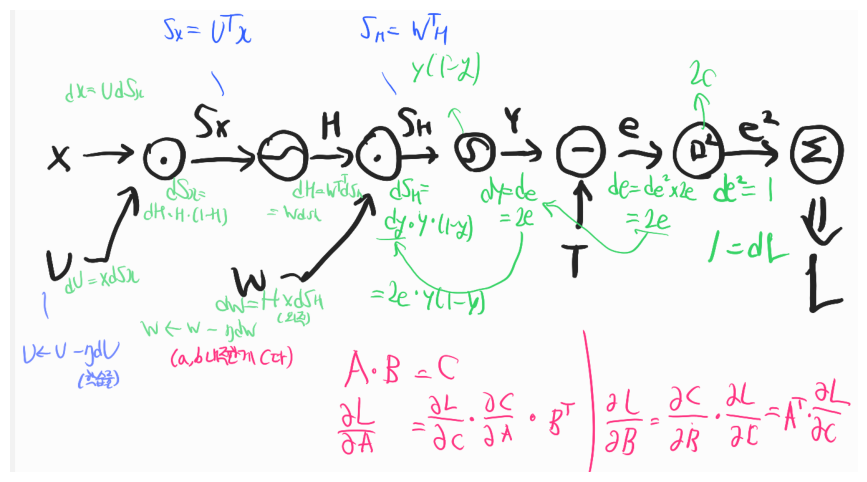

In [8]:
from PIL import Image
import matplotlib.pyplot as plt 
image_path = "C:/Users/carlo/Desktop/AI_CWNU/documents/backpropa2.png"
image = Image.open(image_path) 
plt.figure(figsize = (13,6))
plt.imshow(image)
plt.axis('off')
plt.show() 

In [15]:
loss = []

for i in range(1000):
    e_accum = 0
    true = np.array([1 , 0])
    false = np.array([0 , 1])
    e_accum += train(np.array([0,0]), false) #e_acuum 의 총합이 손실값임
    e_accum += train(np.array([0,1]), true)  
    e_accum += train(np.array([1,0]), true)
    e_accum += train(np.array([1,1]), false) 
    loss.append(e_accum)
    

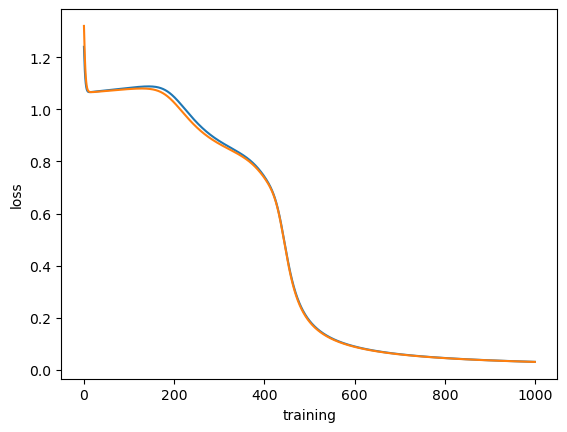

In [19]:
plt.plot(loss)
plt.ylabel("loss")
plt.xlabel("training")
plt.show()

In [20]:
loss[-1]

array([0.03042743, 0.03018812])

In [21]:
def test(X):
    y_hat = []
    for x in X:
        forward_xh(x)
        forward_hy()
        y_hat.append(y_out)
    return y_hat

test(np.array([[0,0] , [0,1] , [1,0] , [1,1]]))

#딮러닝의 장점  
# 다 똑같이 입력이 해고 출력이나 갯수 갈아껴주면 분류든 회귀든 상황에따라서 바꿀수있다 설계를 바꿀필요가 없다
# 모델하나 잘만들면 이문제 저문제 해결할수있음. 



[array([0.12486301, 0.87557809]),
 array([0.9207906 , 0.07889325]),
 array([0.920212  , 0.07946448]),
 array([0.04330727, 0.95696187])]

In [ ]:
텐서플로우 (tensor flow)
데이터 분석하는사람들이 만든 것  -> 자동으로 분석하게 

숫자 1 , 2 , 3를 scalar 라고 함. 

이것의 방향이 생기면 vector 라고 함. 

그백터가 모여서 행과 열로 모이면 행 열이라고 말하고 matrics 라고 말함. 

행열을 더 쌓아서 3 차원 -> 그걸 또 쌓아서 4차원 등등.. 

3 차원 4차원 이상 쌓인 애들을 tensor 라고 부르기로함. (과학자들이 약속함)

그 tensor flow 면 그게 tensor가 흐른다고하면  모델에 따라서 흘러갔다가 거꾸로 가서 다시흘러온다는 의미에 flow로 만듬
(물의 흐름같다고해서 이름을 지음)

